In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [95]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [96]:
df.dtypes

Airline              str
Date_of_Journey      str
Source               str
Destination          str
Route                str
Dep_Time             str
Arrival_Time         str
Duration             str
Total_Stops          str
Additional_Info      str
Price              int64
dtype: object

In [97]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [98]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y")

In [99]:
#drop the missing values
df.dropna(inplace=True)

In [100]:
#extract day.month ,year from date time using dt
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df["Year"] = df['Date_of_Journey'].dt.year

In [101]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [102]:
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_min'] = df['Dep_Time'].str.split(':').str[1].astype(int)

In [103]:
# extract the arrival hour and arrival min from the arrival time column
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

df['Arrival_hour'] = df['Arrival_Time'].dt.hour
df['Arrival_min'] = df['Arrival_Time'].dt.minute

C:\Users\dhana\AppData\Local\Temp\ipykernel_18604\4271647861.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])


In [104]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2026-02-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2026-02-26 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2026-02-26 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [105]:
# extract the duration hour and duration min from the duration column
df['Duration_hour'] = df['Duration'].str.split(' ').str[0]
df['Duration_min'] = df['Duration'].str.split(' ').str[1]

In [106]:
# remove the 'h' and 'm' from the duration hour and duration min columns
df['Duration_hour'] = df['Duration_hour'].astype(str).str.extract(r'(\d+)', expand=False).fillna(0).astype(int)
df['Duration_min'] = df['Duration_min'].astype(str).str.extract(r'(\d+)', expand=False).fillna(0).astype(int)

In [107]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2026-02-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2026-02-26 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2026-02-26 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [108]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [109]:
df.drop('Additional_Info',axis=1,inplace=True,errors='ignore')

In [110]:
df.head()
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [111]:
df['Total_Stops'] = df['Total_Stops'].str.replace(' stops', '')
df['Total_Stops'] = df['Total_Stops'].str.replace(' stop', '')
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop', '0')
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [112]:
df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [113]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2026-03-22 01:10:00,2h 50m,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2026-02-26 13:15:00,7h 25m,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2026-06-10 04:25:00,19h,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2026-02-26 23:30:00,5h 25m,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2026-02-26 21:35:00,4h 45m,1,13302,1,3,2019,16,50,21,35,4,45


In [114]:
df['Total_Stops'] = df['Total_Stops'].replace('non-stop','0 stop')

In [115]:
df['Route'].unique()

<StringArray>
[                        'BLR → DEL',             'CCU → IXR → BBI → BLR',
             'DEL → LKO → BOM → COK',                   'CCU → NAG → BLR',
                   'BLR → NAG → DEL',                         'CCU → BLR',
                   'BLR → BOM → DEL',                   'DEL → BOM → COK',
                   'DEL → BLR → COK',                         'MAA → CCU',
 ...
             'BOM → IDR → DEL → HYD',                   'BOM → BLR → HYD',
                   'BLR → STV → DEL',             'CCU → IXB → DEL → BLR',
             'BOM → JAI → DEL → HYD',             'BOM → VNS → DEL → HYD',
       'BLR → HBX → BOM → NAG → DEL',             'BLR → BOM → IXC → DEL',
 'BLR → CCU → BBI → HYD → VGA → DEL',                   'BOM → BBI → HYD']
Length: 128, dtype: str

In [116]:
# extract the route column into mutiple columns
df['Route_1'] = df['Route'].str.split('→').str[0].str.strip()
df['Route_2'] = df['Route'].str.split('→').str[1].str.strip()
df['Route_3'] = df['Route'].str.split('→').str[2].str.strip()
df['Route_4'] = df['Route'].str.split('→').str[3].str.strip()  
df['Route_5'] = df['Route'].str.split('→').str[4].str.strip()

In [117]:
# extract the route column into mutiple columns
df['Route_1'] = df['Route'].fillna('None')
df['Route_2'] = df['Route'].fillna('None')
df['Route_3'] = df['Route'].fillna('None')
df['Route_4'] = df['Route'].fillna('None') 
df['Route_5'] = df['Route'].fillna('None')

In [118]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,...,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2026-03-22 01:10:00,2h 50m,0,3897,24,...,20,1,10,2,50,BLR → DEL,BLR → DEL,BLR → DEL,BLR → DEL,BLR → DEL
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2026-02-26 13:15:00,7h 25m,2,7662,1,...,50,13,15,7,25,CCU → IXR → BBI → BLR,CCU → IXR → BBI → BLR,CCU → IXR → BBI → BLR,CCU → IXR → BBI → BLR,CCU → IXR → BBI → BLR
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2026-06-10 04:25:00,19h,2,13882,9,...,25,4,25,19,0,DEL → LKO → BOM → COK,DEL → LKO → BOM → COK,DEL → LKO → BOM → COK,DEL → LKO → BOM → COK,DEL → LKO → BOM → COK
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2026-02-26 23:30:00,5h 25m,1,6218,12,...,5,23,30,5,25,CCU → NAG → BLR,CCU → NAG → BLR,CCU → NAG → BLR,CCU → NAG → BLR,CCU → NAG → BLR
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2026-02-26 21:35:00,4h 45m,1,13302,1,...,50,21,35,4,45,BLR → NAG → DEL,BLR → NAG → DEL,BLR → NAG → DEL,BLR → NAG → DEL,BLR → NAG → DEL


In [119]:
# remove route column
df.drop('Route',axis=1,inplace=True)

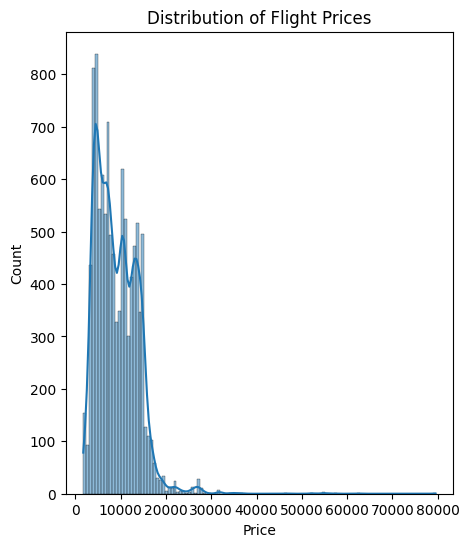

In [120]:
# plot the distribution of the target variable
plt.figure(figsize=(5,6))
sns.histplot(df['Price'],kde=True)
plt.title('Distribution of Flight Prices')
plt.show()

In [121]:
df['Airline'].value_counts

<bound method IndexOpsMixin.value_counts of 0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: str>

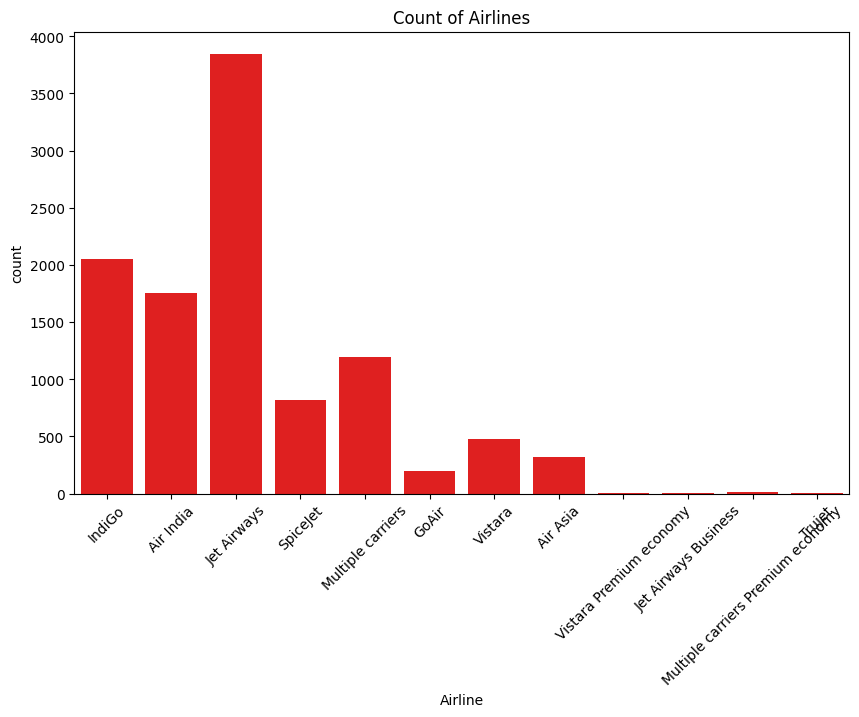

In [122]:
# plot the count of airlines
plt.figure(figsize=(10,6))
sns.countplot(x='Airline',data=df,color='red')
plt.title('Count of Airlines')
plt.xticks(rotation=45)
plt.show()

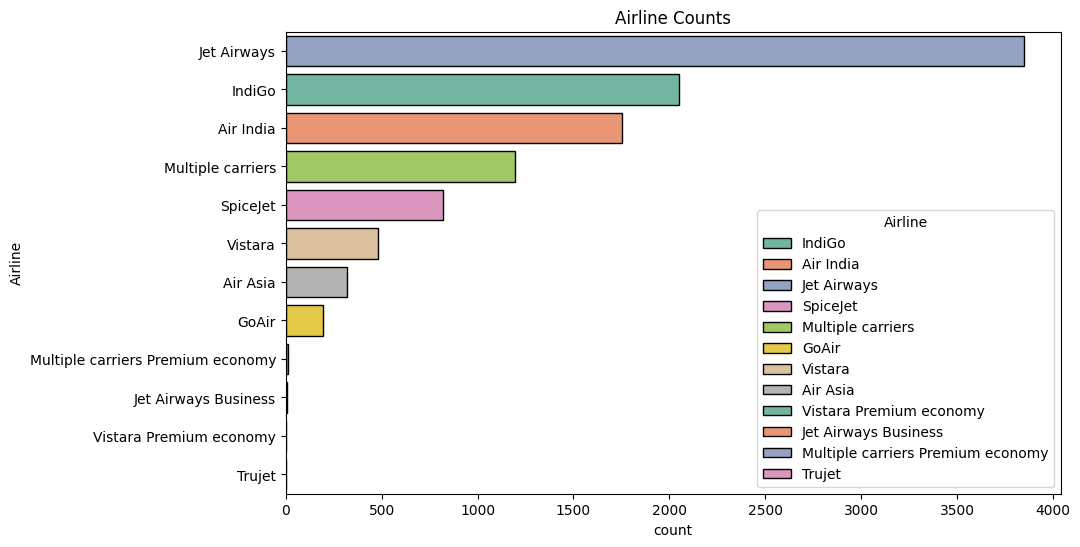

In [123]:
# plot the airline counts
plt.figure(figsize=(10, 6))
# make horizontal bar plot of airline counts
sns.countplot(y=d['Airline'], order=d['Airline'].value_counts().index,hue=d['Airline'],edgecolor='black',palette='Set2',dodge=False,legend=True)
plt.title('Airline Counts')
plt.show()

In [128]:
#step 5: feature encoding

# encode the airline column using one hot encoding

df = pd.get_dummies(df, columns=['Airline'], drop_first=True)

In [132]:
# convert all airline boolean datatype to int
d = d.astype({col: 'int64' for col in d.select_dtypes(include=['bool']).columns})

In [133]:
df.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Year,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,22:20,2026-03-22 01:10:00,2h 50m,0,3897,24,3,2019,...,False,True,False,False,False,False,False,False,False,False
1,Kolkata,Banglore,05:50,2026-02-26 13:15:00,7h 25m,2,7662,1,5,2019,...,False,False,False,False,False,False,False,False,False,False
2,Delhi,Cochin,09:25,2026-06-10 04:25:00,19h,2,13882,9,6,2019,...,False,False,True,False,False,False,False,False,False,False
3,Kolkata,Banglore,18:05,2026-02-26 23:30:00,5h 25m,1,6218,12,5,2019,...,False,True,False,False,False,False,False,False,False,False
4,Banglore,New Delhi,16:50,2026-02-26 21:35:00,4h 45m,1,13302,1,3,2019,...,False,True,False,False,False,False,False,False,False,False


In [135]:
# all categorical columns convert into label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

C:\Users\dhana\AppData\Local\Temp\ipykernel_18604\2737144952.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object']).columns


In [136]:
# check central tendency of price column
print('Mean:', df['Price'].mean())
print('Median:', df['Price'].median())
print('Mode:', df['Price'].mode()[0])

Mean: 9087.21456656057
Median: 8372.0
Mode: 10262


In [140]:
print(df.columns)

Index(['Source', 'Destination', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hour', 'Duration_min',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='str')


In [141]:
df = df.drop([
    'Source',
    'Destination',
    'Dep_Time',
    'Arrival_Time',
    'Duration',
    'Route_1',
    'Route_2',
    'Route_3',
    'Route_4',
    'Route_5'
], axis=1)

In [142]:
print(df.dtypes)

Total_Stops                                  int64
Price                                        int64
Day                                          int32
Month                                        int32
Year                                         int32
Dep_hour                                     int64
Dep_min                                      int64
Arrival_hour                                 int32
Arrival_min                                  int32
Duration_hour                                int64
Duration_min                                 int64
Airline_Air India                             bool
Airline_GoAir                                 bool
Airline_IndiGo                                bool
Airline_Jet Airways                           bool
Airline_Jet Airways Business                  bool
Airline_Multiple carriers                     bool
Airline_Multiple carriers Premium economy     bool
Airline_SpiceJet                              bool
Airline_Trujet                 

In [144]:
# model 1 linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr=LinearRegression()
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 2030.539562642908
Mean Squared Error: 8846014.74654683
R2 Score: 0.5897415991519206


In [145]:
# model 2 Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_dt))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_dt))
print('R2 Score:', r2_score(y_test, y_pred_dt))

Mean Absolute Error: 1422.1043128997037
Mean Squared Error: 6750463.831223548
R2 Score: 0.6869285688833313


In [146]:
# model 3 svm
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=10, gamma='scale')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_svr))
print('R2 Score:', r2_score(y_test, y_pred_svr))

Mean Absolute Error: 2047.0580521871323
Mean Squared Error: 10903466.41513171
R2 Score: 0.494321587365783


In [147]:
# model 4 knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_knn))
print('R2 Score:', r2_score(y_test, y_pred_knn))

Mean Absolute Error: 1897.2041803150835
Mean Squared Error: 9986507.907866688
R2 Score: 0.5368480743334247


In [148]:
# model 5: random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('R2 Score:', r2_score(y_test, y_pred_rf))

Mean Absolute Error: 1222.820404022692
Mean Squared Error: 4707476.621307137
R2 Score: 0.7816777513918243


In [149]:
# make a dataframe to compare the performance of all the models
model_comparison = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree Regressor', 'SVR', 'KNN Regressor', 'Random Forest Regressor'],
                                 'MAE': [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_dt), mean_absolute_error(y_test, y_pred_svr), mean_absolute_error(y_test, y_pred_knn), mean_absolute_error(y_test, y_pred_rf)],
                                 'MSE': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_dt), mean_squared_error(y_test, y_pred_svr), mean_squared_error(y_test, y_pred_knn), mean_squared_error(y_test, y_pred_rf)],
                                 'R2 Score': [r2_score(y_test, y_pred), r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_svr), r2_score(y_test, y_pred_knn), r2_score(y_test, y_pred_rf)]})
model_comparison

,Model,MAE,MSE,R2 Score
0,Linear Regression,2030.539563,8.846015e+06,0.589742
1,Decision Tree Regressor,1422.104313,6.750464e+06,0.686929
2,SVR,2047.058052,1.090347e+07,0.494322
3,KNN Regressor,1897.204180,9.986508e+06,0.536848
4,Random Forest Regressor,1222.820404,4.707477e+06,0.781678
